In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [137]:
df = pd.read_csv('Swan_Project_Data.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [39]:
pd.set_option('display.max_rows', None)

In [7]:
df.shape

(7043, 31)

In [8]:
df.CustomerID.nunique()

7043

In [9]:
df.Country.unique()

array(['United States'], dtype=object)

In [10]:
df.State.unique()

array(['California'], dtype=object)

In [11]:
df.City.unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [12]:
df.City.nunique()

1129

In [ ]:
#Lat long need to be checked

In [14]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [80]:
#Handling missing values
def null_vals(dataframe):
#Function to show both number of nulls and the percentage of nulls in the whole column
    null_vals = dataframe.isnull().sum() # How many nulls in each column
    total_cnt = len(dataframe) # Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) # Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) # Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False) #Return the number and percentage of missing values, order by percentage descending
null_vals(df) #Display the table

,null,percent
Churn Reason,5174,73.463
Internet Service,0,0.000
Churn Value,0,0.000
Churn Label,0,0.000
Total Charges,0,0.000
Monthly Charges,0,0.000
Payment Method,0,0.000
Paperless Billing,0,0.000
Contract,0,0.000
Streaming Movies,0,0.000


In [19]:
df['Churn Value'][df['Churn Label'] == 'Yes'].value_counts()

1    1869
Name: Churn Value, dtype: int64

In [20]:
df['Churn Value'][df['Churn Label'] == 'No'].value_counts()

0    5174
Name: Churn Value, dtype: int64

In [23]:
df['Churn Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

In [25]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [33]:
import re

In [81]:
# # Checking the format of Total charges because we can't cast float dtype
# df['Total Charges'].strip().astype(float)

# #str.findall('[^0-9A-Za-z]+')

In [54]:
# Indexes, where total charge is blank: 2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840

empty_string_indices = df[df['Total Charges'] == ' '].index
empty_string_indices

Int64Index([], dtype='int64')

In [76]:
#Filling missing total charge values with 0
df['Total Charges'] = df['Total Charges'].fillna(value = 0)

In [78]:
df['Total Charges'].isnull().sum()

0

In [60]:
#Changing total chares to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [62]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [ ]:
#Sanity check failed
df['Total Charges'] == df['Tenure Months'] * df['Monthly Charges']
#Ask Alex what to do with missing values of Total Charges
#We could create a new column for additional charges: total - (months * monthly charges)

In [79]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000


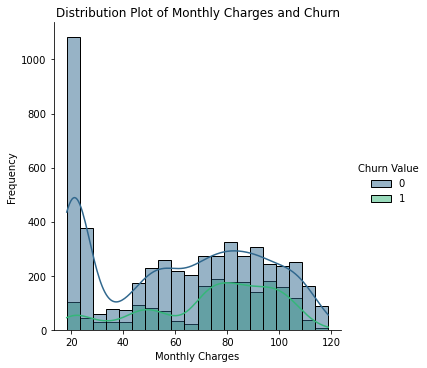

In [85]:
#Is churn related to amount of monthly charges?
sns.displot(data=df, x='Monthly Charges', hue='Churn Value', kind='hist', kde=True, palette='viridis', bins=20)
plt.title('Distribution Plot of Monthly Charges and Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

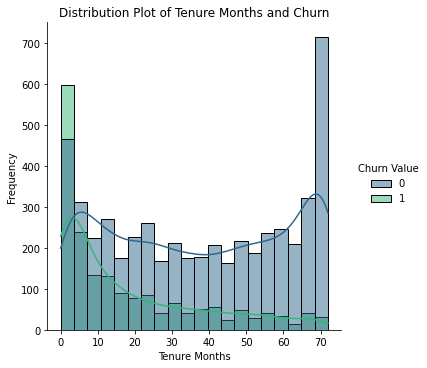

In [86]:
#Is churn related to duration of service?
sns.displot(data=df, x='Tenure Months', hue='Churn Value', kind='hist', kde=True, palette='viridis', bins=20)
plt.title('Distribution Plot of Tenure Months and Churn')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [87]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices


In [138]:
df['Internet Service'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: Internet Service, dtype: int64

In [124]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [125]:
df['Senior Citizen'] = df['Senior Citizen'].map({'No':0, 'Yes':1})

In [126]:
df['Partner'] = df['Partner'].map({'No':0, 'Yes':1})

In [127]:
df['Dependents'] = df['Dependents'].map({'No':0, 'Yes':1})

In [128]:
df['Phone Service'] = df['Phone Service'].map({'No':0, 'Yes':1})

In [129]:
df['Multiple Lines'] = df['Multiple Lines'].map({'No':0, 'Yes':1})

In [130]:
df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'int_serv')

In [131]:
df = pd.get_dummies(df, columns = ['Online Security'], drop_first = True, prefix = 'online_secur')

In [132]:
df = pd.get_dummies(df, columns = ['Online Backup'], drop_first = True, prefix = 'online_back')

In [136]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason,dev_protec_No internet service,dev_protec_Yes,tech_supp_No internet service,tech_supp_Yes,stream_tv_No internet service,stream_tv_Yes,stream_movie_No internet service,stream_movie_Yes,contract_One year,contract_Two year,pay_method_Credit card (automatic),pay_method_Electronic check,pay_method_Mailed check,int_serv_Fiber optic,int_serv_No,online_secur_No internet service,online_secur_Yes,online_back_No internet service,online_back_Yes
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,NaN,NaN,NaN,NaN,2,NaN,NaN,1,53.85,108.15,Yes,1,Competitor made better offer,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,NaN,NaN,NaN,NaN,2,NaN,NaN,1,70.70,151.65,Yes,1,Moved,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,NaN,NaN,NaN,NaN,8,NaN,NaN,1,99.65,820.50,Yes,1,Moved,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,NaN,NaN,NaN,NaN,28,NaN,NaN,1,104.80,3046.05,Yes,1,Moved,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,NaN,NaN,NaN,NaN,49,NaN,NaN,1,103.70,5036.30,Yes,1,Competitor had better devices,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1


In [134]:
df = pd.get_dummies(df, columns = ['Device Protection'], drop_first = True, prefix = 'dev_protec')

KeyError: "None of [Index(['Device Protection'], dtype='object')] are in the [columns]"

In [135]:
df = pd.get_dummies(df, columns = ['Tech Support'], drop_first = True, prefix = 'tech_supp')

KeyError: "None of [Index(['Tech Support'], dtype='object')] are in the [columns]"

In [115]:
df = pd.get_dummies(df, columns = ['Streaming TV'], drop_first = True, prefix = 'stream_tv')

In [117]:
df = pd.get_dummies(df, columns = ['Streaming Movies'], drop_first = True, prefix = 'stream_movie')

In [119]:
df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'contract')

In [121]:
df['Paperless Billing'] = df['Paperless Billing'].map({'No':0, 'Yes':1})

In [123]:
df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'pay_method')